Tak, importy zadziałały, a komunikat ten oznacza, że wszystkie narzędzia są gotowe do użycia w naszym projekcie.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# TopFarm2
from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK ")

Imports OK 


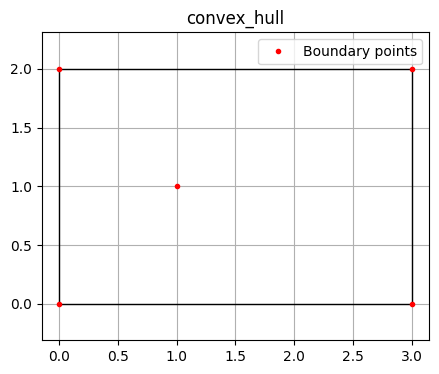

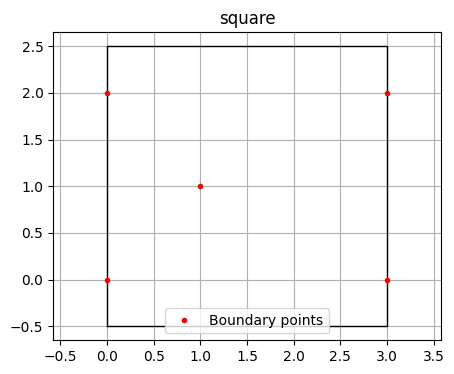

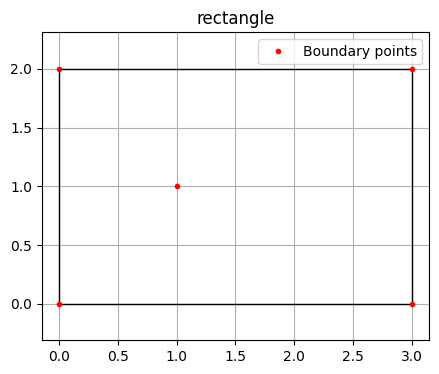

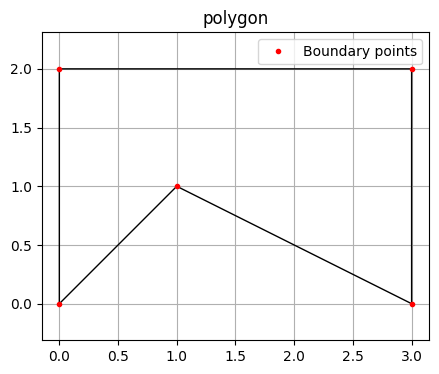

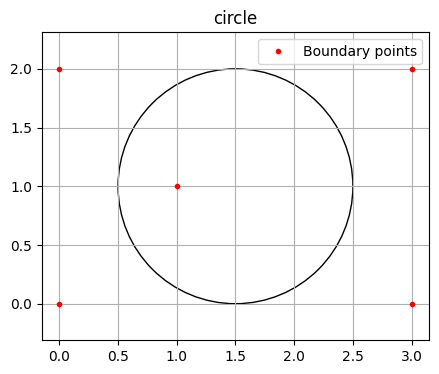

In [9]:
# 1) Punkty granicy (współrzędne w "umownych" jednostkach)
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

# 2) “Sztuczne” turbiny (tylko do rysowania)
x = [0.5, 1.5]
y = [0.5, 1.5]

# 3) Dummy koszt: nie optymalizujemy jeszcze AEP, tylko potrzebujemy obiektu problemu
dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

# 4) Różne typy granicy (to jest “wow” wizualizacji)
plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

Przeanalizowaliśmy pięć wariantów granic terenu, co wizualnie pokazało różnice między obszarem ściśle dopasowanym do punktów geodezyjnych a uproszczonymi strefami o regularnych kształtach.

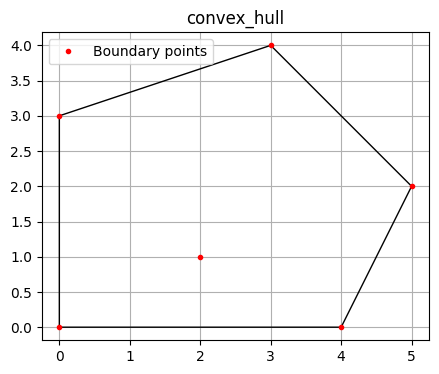

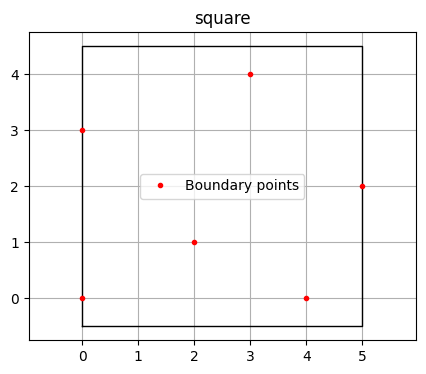

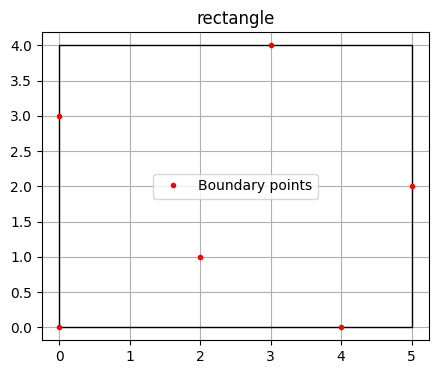

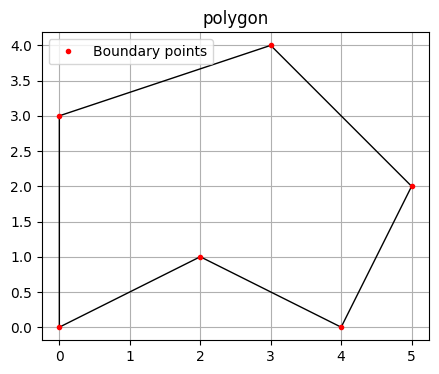

In [10]:
boundary = np.array([
    (0, 0),
    (2, 1),
    (4, 0),
    (5, 2),
    (3, 4),
    (0, 3)
])

for boundary_type in ['convex_hull', 'square', 'rectangle', 'polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))

Zdefiniowaliśmy nieregularną działkę z wcięciami i zauważyliśmy, że polygon wiernie odwzorowuje jej dokładny, wklęsły kształt (co odpowiada rzeczywistym granicom prawnym), podczas gdy convex_hull "wypełnia" te wcięcia, tworząc uproszczoną otoczkę zewnętrzną przypominającą naciągniętą gumkę.

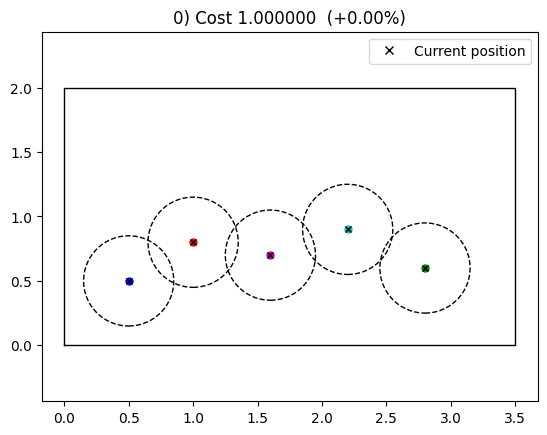

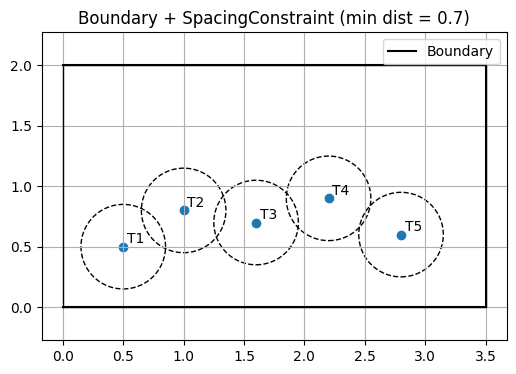

In [11]:
# Układ 5 turbin (na start celowo dość blisko)
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

# Duża prostokątna granica, żeby “nie przeszkadzała”
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

spacing = 0.7  # <- spróbujmy 0.4 / 0.7 / 1.0 i zobaczmy różnicę
tf = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing)
    ],
    plot_comp=XYPlotComp()
)

tf.setup()
tf.evaluate()

plt.figure(figsize=(6, 4))
plt.title(f"Boundary + SpacingConstraint (min dist = {spacing})")
tf.plot_comp.plot_constraints()
plt.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
plt.scatter(x5, y5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    plt.text(xx + 0.03, yy + 0.03, f"T{i}")
plt.axis("equal")
plt.grid(True)
plt.legend()

Zmieniając wartość spacing, symulujemy różne wymogi techniczne, co pozwala sprawdzić, czy turbiny nie stoją zbyt blisko siebie – w praktyce jest to kluczowe, aby uniknąć wzajemnego "zabierania wiatru" i zapewnić bezpieczeństwo konstrukcji.

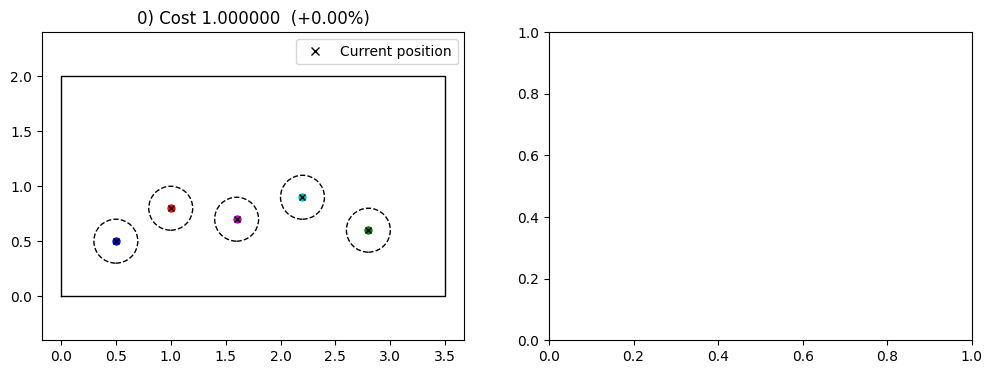

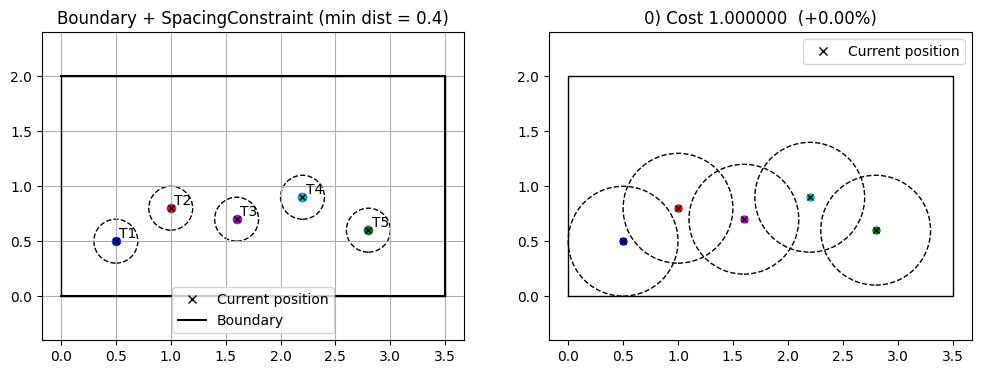

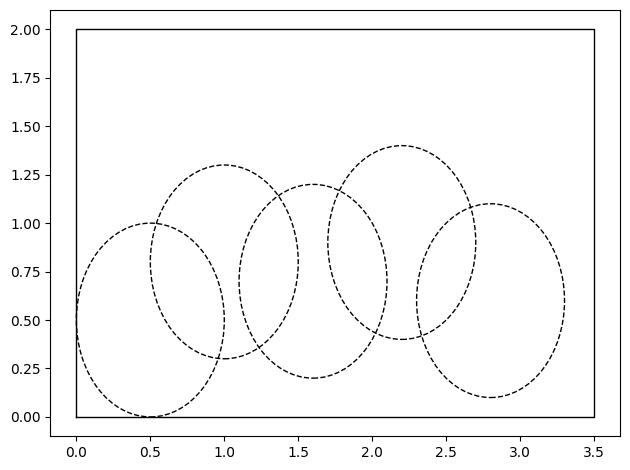

In [12]:
# Układ 5 turbin
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

# Duża prostokątna granica
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

# Dwa warianty spacing
spacings = [0.4, 1.0]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for idx, spacing in enumerate(spacings):
    ax = axes[idx]
    plt.sca(ax)  # Set current axes
    
    tf = TopFarmProblem(
        design_vars={'x': x5, 'y': y5},
        cost_comp=dummy_cost5,
        constraints=[
            XYBoundaryConstraint(boundary_big, 'polygon'),
            SpacingConstraint(spacing)
        ],
        plot_comp=XYPlotComp()
    )
    
    tf.setup()
    tf.evaluate()
    
    ax.set_title(f"Boundary + SpacingConstraint (min dist = {spacing})")
    tf.plot_comp.plot_constraints()
    ax.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
    ax.scatter(x5, y5)
    for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
        ax.text(xx + 0.03, yy + 0.03, f"T{i}")
    ax.axis("equal")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

Dzięki zestawieniu dwóch wykresów obok siebie widać gołym okiem, że zwiększenie wymaganego odstępu (spacing=1.0) powoduje drastyczne nakładanie się stref ochronnych turbin, co w praktyce sygnalizuje niedopuszczalne naruszenie norm bezpieczeństwa i ryzyko strat energetycznych (przez cień aerodynamiczny).